In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv("epa-sea-level.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


<Axes: xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

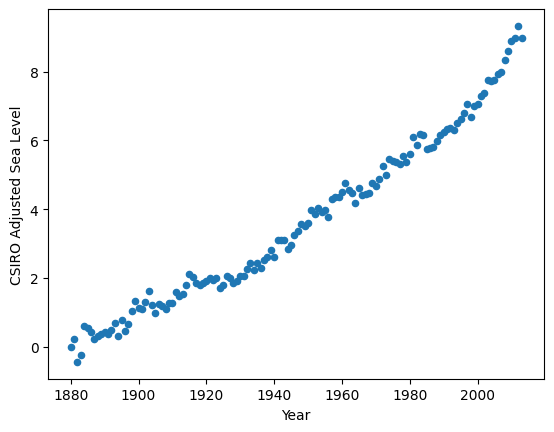

In [ ]:
df.plot(x="Year",y="CSIRO Adjusted Sea Level",kind="scatter")

In [9]:
regression = linregress(x=df["Year"],y=df["CSIRO Adjusted Sea Level"])

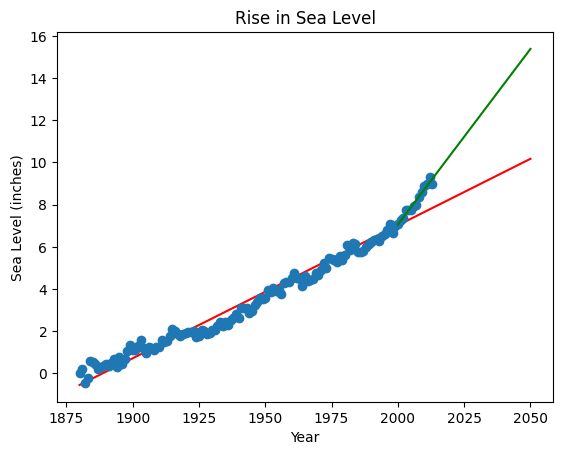

In [10]:
x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]
x_pred = np.arange(x.min(), 2051, 1) 
y_pred = regression.intercept + regression.slope * x_pred
plt.plot(x_pred, y_pred, 'r')
plt.plot(x, y, 'o', label='original data')
df_aux = df[df["Year"] >= 2000]
x_aux = df_aux["Year"].values
y_aux = df_aux["CSIRO Adjusted Sea Level"].values
regression_aux = linregress(x_aux, y_aux)
x_aux_pred = np.arange(2000, 2051, 1)
y_aux_pred = regression_aux.intercept + regression_aux.slope * x_aux_pred
plt.plot(x_aux_pred, y_aux_pred, 'green')
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")
plt.savefig('sea_level_plot.png')
